### 40 Le chiffre de Vigenère

Compléter le fichier `vigenere.py` pour coder un texte en utilisant le chiffrement de Vigenère.

_NOTE: De manière surprenante, ce chiffre est étonnamment robuste. Il a fallu attendre le XIX<sup>e</sup> pour que l'on sache décrypter efficacement ce genre de messages codés._


Pour utiliser le chiffrement de Vigenère, la première étape consiste à construire la "table de Vigenère" (aussi appelée "carré de Vigenère" et "tabula recta").
Il s'agit d'une matrice de 26x26 caractères. Chaque ligne contient une permutation de l'alphabet, et chaque ligne est obtenue de la précédente en décalant l'alphabet d'une case vers la gauche.
Nous n'utiliserons que des majuscules.

Construire cette matrice, en utilisant la fonction Python `chr`: 
`chr(i)` renvoie le caractère dont le code Unicode est le nombre entier i : `chr(65) == 'A'`, `chr(91)== 'Z'`, donc pour tout entier `j<26`, `chr(j+65)` renvoie la `j` ième lettre de l'alphabet.

In [ ]:
carre_vigenere = [...] # a compléter

# Test:
print(carre_vigenere[0][0] == 'A')
print(carre_vigenere[0][1] == 'B')
print(carre_vigenere[1][0] == 'B')
print(carre_vigenere[25][25] == 'Y')

Nous aurons besoin d'une fonction qui calcule le rang d'une lettre. Pour cela, on utilisera la fonction Python `ord` qui est l'inverse de la fonction `chr`: `ord('A')=65` et `ord('Z')=90`
Ecrire une fonction rang qui prend en entrée une lettre majuscule et retourne son rang : on souhaite bien sûr obtenir le rang 0 pour 'A', etc.

In [ ]:
def rang(c):
    """ 
    Entrée: un caractère c
    Renvoie le rang du caractère """
    return # A compléter

# Test:
print(rang('A') == 0)

Le chiffrement de Vigenère prend en entrée:
- un texte à chiffrer t
- une clé de chiffrement c.

On commencer par répéter la clé de chiffrement jusqu'à obtenir exactement la même longueur que le texte à chiffrer. On se retrouve ainsi (quitte à couper la fin si nécessaire) avec deux chaines de caractères `c` et `t` de même longueur. 
Pour chiffrer le i ème caractère du texte d'entrée, on utilise le caractère présent dans la ligne `c[i]` à la colonne `t[i]` du carré de vigenère.

Ainsi, si l'on chiffre LETRESOR avec la clé SECRET, on commence par répéter SECRET autant de fois que nécessaire (une suffit ici): SECRETSE. La première lettre du texte chiffré est donnée par l'intersection de la ligne S et colonne L: D.
Le caractère suivant  l'intersection des ligne et colonne E : I. Le chiffré complet est 
DIVIILGV.


Dans le code suivant, 
- plutôt que de répéter le secret, on écrira les accès au clé de chiffrement "modulo la longueur du clé de chiffrement".
- on utiliser le carré de vigenère construit précédemment, qui est indexé par des entiers plutôt que des caractères, donc on utilisera la fonction rang définie précédemment. 
Compléter la fonction suivante qui indique le code d'un caractère.

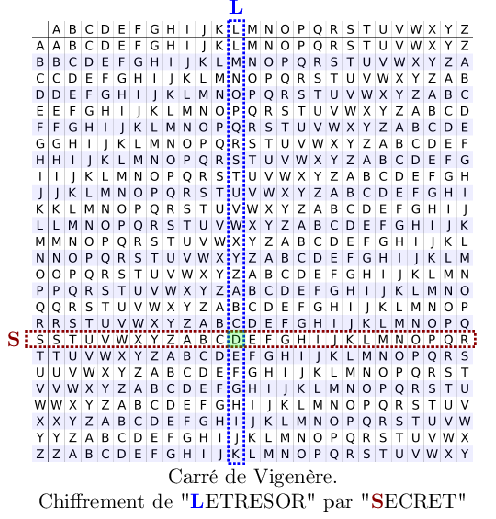

In [ ]:
def code_caractere(caractere, i, cle, carre_vigenere):
    """
    Entrée:
    - un caractère du texte d'entrée
    - sa position (indice) i dans le texte d'entrée
    - une clé de chiffrement cle (pouvant être de longueur plus courte que i)
    - le carré de vigenere
    Renvoie: le caractère (chiffré) utilisé pour coder le caractère donné en entrée"""
    return # A compléter

# Test:
print(code_caractere('L',0,'SECRET',carre_vigenere) == 'D')

A l'aide de la fonction précédente, compléter la fonction fonction qui code le message.

In [ ]:
def code(message, cle):
    """
    Entrée:
    - un message à chiffrer
    - une clé de chiffrement cle
    Renvoie: le texte t chiffré.
    """
    carre_vigenere = # A compléter
    # A compléter : définir un tableau message_chiffre 
    # dont la ieme valeur est obtenue en appliquant code_caractere 
    # au caractère correspondant du message donné en entrée en clair
    return "".join(message_chiffre)

# Test:
print(code("LETRESOR", "SECRET") == 'DIVIILGV')

Pour décoder un texte chiffré dont on connait la clé de chiffrement c, 
une solution est de procéder comme suit;
pour décoder le caractère à la position i dans le message chiffré, on parcourt la ligne 
`rang(c[i%len(c)])` jusqu'à y trouver le caractère chiffré. La colonne où l'on a trouvé le caractère chiffré indique le caractère déchiffré (on peut observer le caractère déchiffré sur la première ligne de cette colonne).




In [ ]:
def decode(m,c):
    """
    Entrée:
    - un message m à déchiffrer
    - une clé de chiffrement cle
    Renvoie: le texte t déchiffré.
    """
    carre_vigenere = # A compléter
    message_dechiffre = [None]*len(m)
    for i in range(len(m)):
        j=0
        # A compléter afin que j vaille l'indice où on a trouvé le caractère.
        message_dechiffre[i] = carre_vigenere[0][j]
    return "".join(message_dechiffre)

#Test:
print(decode('DIVIILGV','SECRET') == 'LETRESOR')

Quelques éléments de réflexion pour aller plus loin :
a. Est-il nécessaire de calculer le carré de vigenère ou peut-on s'en passer facilement sur un ordinateur ?
b. (Difficile) Si on connait la longueur de la clé, mais pas la clé elle-même, est-il extrêmement difficile de déchiffrer un long message correspondant à un texte en français ? Pourquoi? 

_Indication: ce qui rend le code de Vigenère un peu difficile à déchiffrer en général sans connaître la clé, c'est qu'une même lettre de l'alphabet peut être codée par plusieurs lettres dans le message chiffré, contrairement au chiffrement de César. 
Le chiffrement de César est, lui, facile à déchiffrer puisque chaque lettre du texte en clair est toujours codée par la même lettre dans le message chiffré : comme on connaît la fréquence des lettres dans un texte français (ex: la fréquence du "e" est de 12%, celle du "a" de 7%...) à partir d'un texte chiffré suffisamment long on peut identifier quelle lettre code le "e" : c'est la lettre la plus fréquente, celle qui a une fréquence proche de 12%. On pourrait faire pareil pour les autres lettres, mais dans le cadre d'un chiffrement de César, on sait en plus que le code se contente de décaler les lettres de l'alphabet donc on n'a pas besoin d'identifier une permutation quelconque; il suffit d'identifier le décalage. Ainsi, si les "e" du texte en clair sont codés par "g" dans un message chiffré par le code de César on sait que toutes les lettres ont été "décalées" de 2_

In [ ]:
def code_bis(m,c):
    return ''.join([chr((rang(m[i])+rang(c[i%len(c)]))%26+65) for i in range(len(m))])

def decode_bis(m,c):
    return ''.join([chr((rang(m[i])-rang(c[i%len(c)]))%26+65) for i in range(len(m))])

#Test
print(code_bis('LETRESOR','SECRET') == 'DIVIILGV')
print(decode_bis('DIVIILGV','SECRET') == 'LETRESOR')
